In [1]:
import cv2
import numpy as np

import PIL
import matplotlib.pyplot as plt

In [2]:
image1 = cv2.imread('../data/left.png')
image2 = cv2.imread('../data/front.png')

In [3]:
gray1 = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)
gray2 = cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY)

In [4]:
sift = cv2.SIFT_create()
keypoints1, descriptors1 = sift.detectAndCompute(gray1, None)
keypoints2, descriptors2 = sift.detectAndCompute(gray2, None)

In [ ]:
FLANN_INDEX_KDTREE = 1
index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
search_params = dict(checks=50) # or pass empty dictionary

In [ ]:
flann = cv2.FlannBasedMatcher(index_params,search_params)

In [5]:
matches = flann.knnMatch(descriptors1, descriptors2, k=2)

In [8]:
matchesMask = [[0,0] for i in range(len(matches))]

In [10]:
for i,(m,n) in enumerate(matches):
    if m.distance < 0.7*n.distance:
        matchesMask[i]=[1,0]

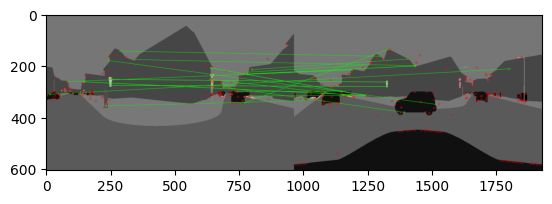

(<matplotlib.image.AxesImage at 0x1ec82404dd0>, None)

In [14]:
draw_params = dict(matchColor = (0,255,0),
    singlePointColor = (255,0,0),
    matchesMask = matchesMask,
    flags = cv2.DrawMatchesFlags_DEFAULT)

good_matches = []
for m,n in matches:
    if m.distance < 0.7 * n.distance:
        good_matches.append(m)
 
img3 = cv2.drawMatchesKnn(gray1,keypoints1, gray2,keypoints2,matches,None,**draw_params)
 
plt.imshow(img3,),plt.show()

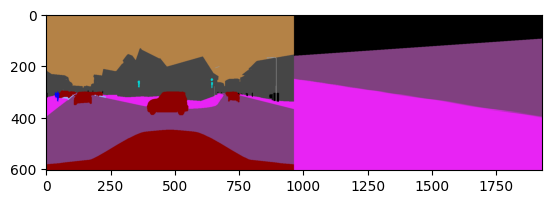

(<matplotlib.image.AxesImage at 0x1ecff7e9390>, None)

In [15]:
src_points = np.float32([keypoints1[match.queryIdx].pt for match in good_matches]).reshape(-1, 1, 2)
dst_points = np.float32([keypoints2[match.trainIdx].pt for match in good_matches]).reshape(-1, 1, 2)

M, mask = cv2.findHomography(src_points, dst_points, cv2.RANSAC, 5.0)

# Use homography to warp images
h, w, _ = image1.shape
panorama = cv2.warpPerspective(image1, M, (w * 2, h))


# Place the second image into the panorama
panorama[0:image2.shape[0], 0:image2.shape[1]] = image2
img4 = panorama

plt.imshow(img4), plt.show()